# Homework 2

## Problem 1

<!-- Let $f(x) = 2\sin x - \cos{2x}$. Write a function `beauty_derivative_plot` that takes a point $x$ and plots the function $f(x)$ and its derivative $f'(x)$ in the range $x \in [-2\pi, 2\pi]$. The function should also plot the tangent line to the function at the point $x$.

Example of output for $x = -3, -2, 1.7$:

```python
beauty_derivative_plot(-3)
```
<img src="https://i.ibb.co/W4pyPfTX/tangent-line-3-0.png" width="600"/>

```python
beauty_derivative_plot(-2)
```
<img src="https://i.ibb.co/F4zDq8m0/tangent-line-2-0.png" width="600"/>

```python
beauty_derivative_plot(1.7)
```
<img src="https://i.ibb.co/TBmLXg2h/tangent-line-1-7.png" width="600"/> -->

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def beauty_derivative_plot(x):
    x_axis = np.linspace(-2 * np.pi, 2 * np.pi, 500)
    y_axis = 2 * np.sin(x_axis) - np.cos(2 * x_axis) 
    y_derivative_axis =  2 * np.cos(x_axis) + 2 * np.sin(2 * x_axis)

    y = 2 * np.sin(x) - np.cos(2 * x) 
    k = 2 * np.cos(x) + 2 * np.sin(2 * x)
    b = y - k * x
    tangent_x = np.linspace(x - 0.8, x + 0.8, 10)
    tangent_y = tangent_x * k + b

    plt.figure(figsize = (10, 6))
    plt.axis([-2 * np.pi, 2 * np.pi, -4, 4])

    plt.plot(x_axis, y_axis, 'b', label = 'f(x) = 2sin(x) - cos(2x)')
    plt.plot(x_axis, y_derivative_axis, 'r--', label = "f'(x) = 2cos(x) + 2sin(2x)")

    plt.scatter(x, y, color = 'k', zorder = 3)
    
    plt.plot(tangent_x, tangent_y, "g", label = f'Tangent at x = {x}')
    plt.plot([x, x, 0], [0, y, y], 'm--')

    plt.annotate(f"f'({x}) = {k:.2f}", xy=(x, y), xytext=(x - 1, y - 1), 
                 arrowprops={'arrowstyle': '->', 'connectionstyle': 'arc3, rad=0.3'},
                 horizontalalignment='center', verticalalignment='top',
                 fontsize=12)

    plt.legend(loc = 'upper right')
    plt.grid(True)
    plt.title("Function, Derivative and Tangent Line")
    plt.ylabel('y')
    plt.xlabel('x')

    plt.show()


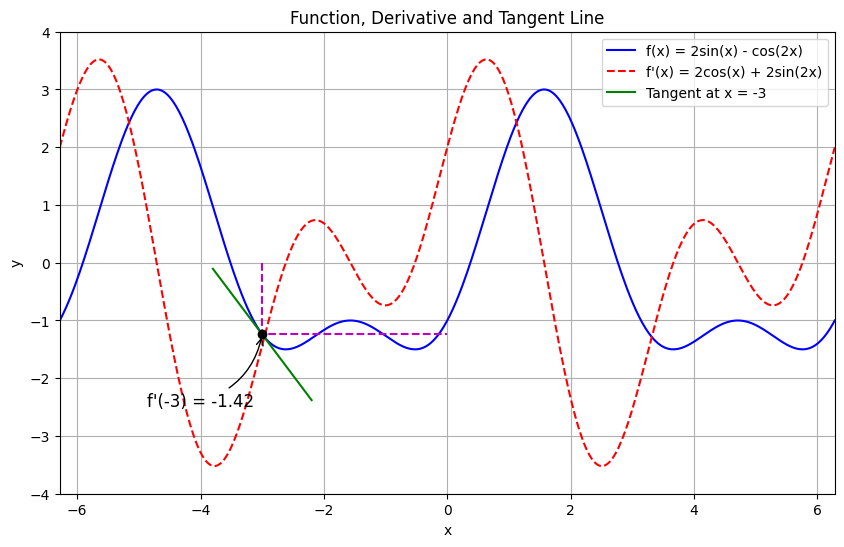

In [3]:
beauty_derivative_plot(-3)

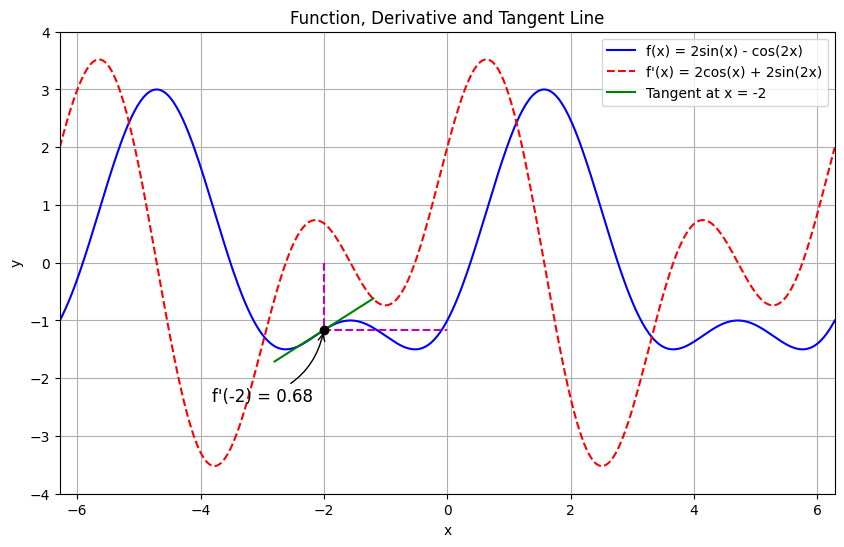

In [4]:
beauty_derivative_plot(-2)

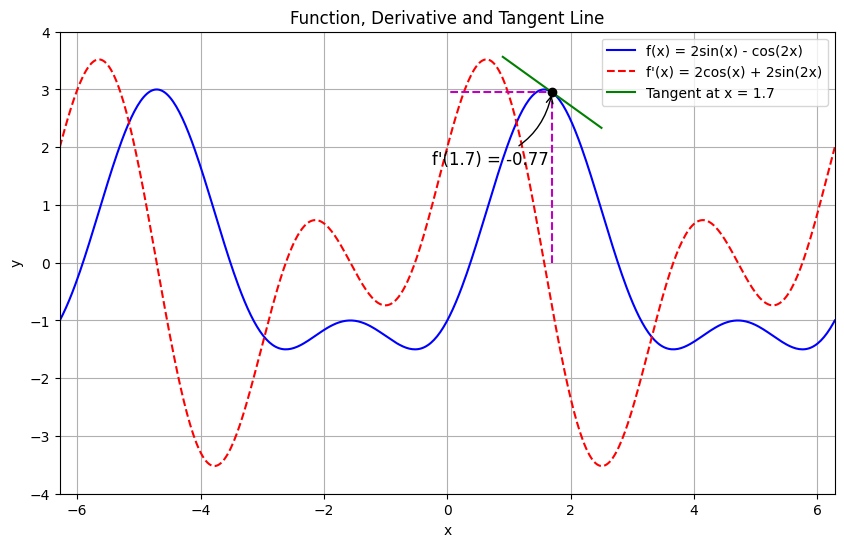

In [5]:
beauty_derivative_plot(1.7)

## Problem 2

The data in [populations.txt](https://drive.google.com/file/d/1Bq7qVzbZIOd058VobGE6iYjUcMFkbZMt/view?usp=drive_link) describes the populations of hares, lynxes and carrots in northern Canada during 20 years. Do the following exercises **without for-loops**.

- Plot the population size of each species for each year on a single graph. Add legend and axis labels to the plot.

In [2]:
arr = np.loadtxt('populations.txt')
years_float, hares, lynxes, carrots = arr[:,0], arr[:,1], arr[:,2], arr[:,3]  

years = years_float.astype(np.int_)

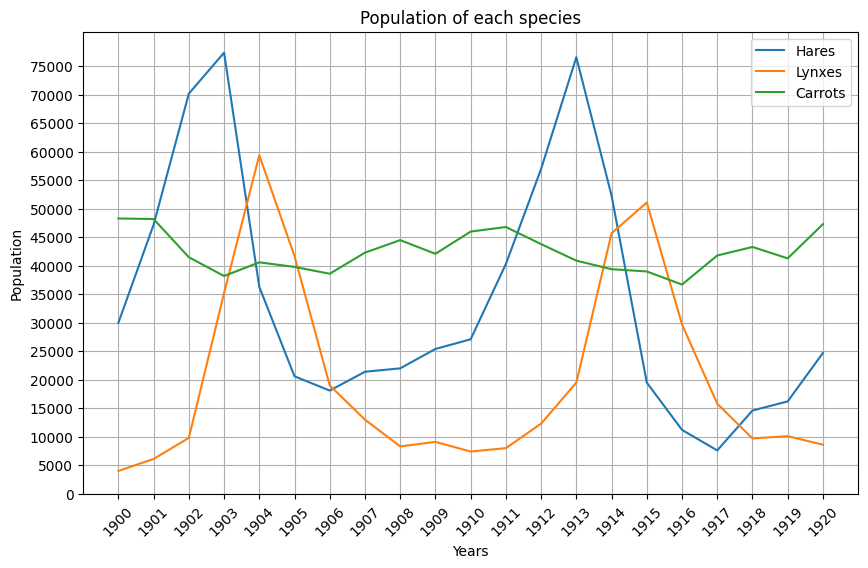

In [159]:
plt.figure(figsize= (10, 6))
plt.plot(years, hares, label = 'Hares')
plt.plot(years, lynxes, label = 'Lynxes')
plt.plot(years, carrots, label = 'Carrots')

plt.xticks(range(min(years), max(years)+1, 1), rotation = 45)  # Метки через каждый 1 год
plt.yticks(range(0, int(max(hares))+1, 5000))   # Метки через каждые 5000 единиц

plt.legend()
plt.title("Population of each species")
plt.xlabel("Years")
plt.grid(True)
plt.ylabel("Population")

plt.show()

- Find which year each species had the largest population. Mark these years in the plot of populations.

In [49]:
index_max_h = np.argmax(arr[:,1]) # h - hares
index_max_l = np.argmax(arr[:,2]) # l - lynxes
index_max_c = np.argmax(arr[:,3]) # c - carrots

max_year_h, max_h = arr[index_max_h, 0], arr[index_max_h, 1]
max_year_l, max_l = arr[index_max_l, 0], arr[index_max_l, 2]
max_year_c, max_c = arr[index_max_c, 0], arr[index_max_c, 3]

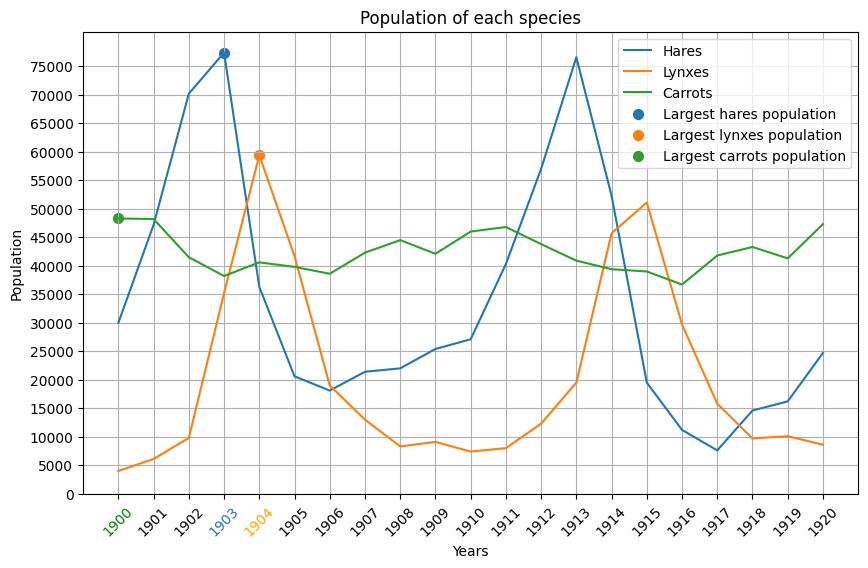

In [160]:
plt.figure(figsize= (10, 6))
plt.plot(years, hares, label = 'Hares')
plt.plot(years, lynxes, label = 'Lynxes')
plt.plot(years, carrots, label = 'Carrots')
plt.scatter(max_year_h, max_h, s = 50, label = 'Largest hares population')
plt.scatter(max_year_l, max_l, s = 50, label = 'Largest lynxes population')
plt.scatter(max_year_c, max_c, s = 50, label = 'Largest carrots population')

plt.xticks(range(min(years), max(years)+1, 1), rotation = 45)  # Метки через каждый год
plt.yticks(range(0, int(max(hares))+1, 5000))   # Метки через каждые 5000 единиц

# меняю цвета меток на оси X
ax = plt.gca()
xticks = ax.get_xticklabels()
for tick in xticks:
    if tick.get_text() == f'{int(max_year_h)}':
        tick.set_color('#1f77b4') # почему-то если пишу blue, то там другой синий, не как на графике
    if tick.get_text() == f'{int(max_year_l)}':
        tick.set_color('orange')
    if tick.get_text() == f'{int(max_year_c)}':
        tick.set_color('green')

plt.legend()
plt.grid(True)
plt.title("Population of each species")
plt.xlabel("Years")
plt.ylabel("Population")

plt.show()

- Assuming total population of hares and lynxes is 100%, plot stacked bar graph showing ratio of each specis for each year in the period.

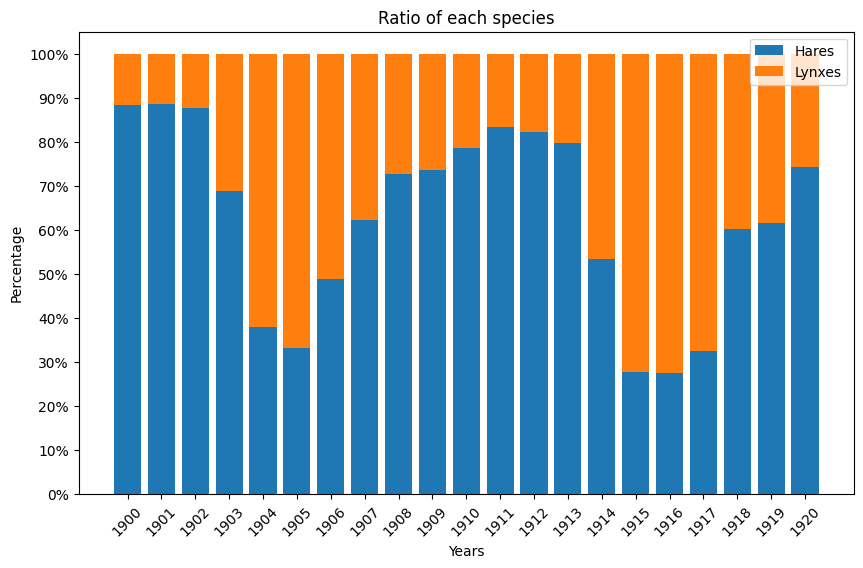

In [162]:
total_population = [h + l for h, l in zip(hares, lynxes)] # h - hares   l - lynxes
hare_percentage = [h / t * 100 for h, t in zip(hares, total_population)] # t - total
lynx_percentage = [l / t * 100 for l, t in zip(lynxes, total_population)]

plt.figure(figsize=(10, 6))
plt.bar(years, hare_percentage, width=0.8, label='Hares')
plt.bar(years, lynx_percentage, bottom=hare_percentage, width=0.8, label='Lynxes')

plt.xticks(range(min(years), max(years)+1, 1), rotation = 45)  # Метки через каждый год
plt.yticks(range(0,101, 10))

#добавляю % на ось y
ax = plt.gca()
yticks = ax.get_yticks()
new_labels = [f"{tick}%" for tick in yticks]
ax.set_yticklabels(new_labels)

plt.xlabel('Years')
plt.ylabel('Percentage')
plt.title('Ratio of each species')
plt.legend()

plt.show()

- Find the mean and std of the populations of each species. Plot the historgam of population for each species and show mean values with vertical line. Show each histogram in a separate plot. Arrange 3 plots in a row.

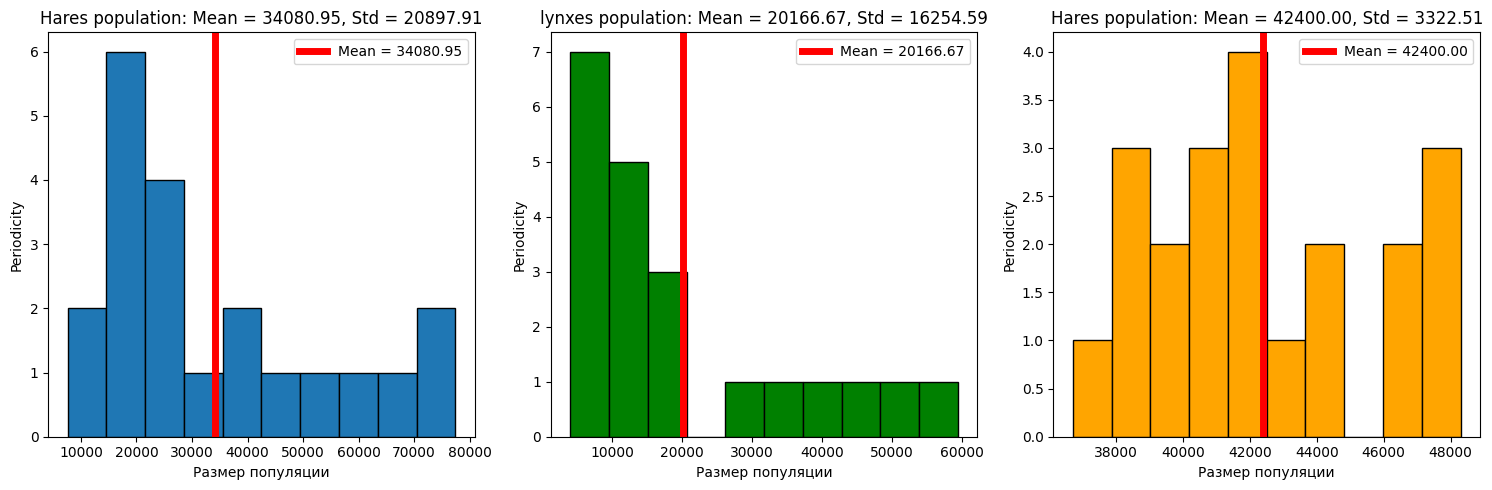

In [97]:
mean_hares = np.mean(hares)
std_hares = np.std(hares)

mean_lynxes = np.mean(lynxes)
std_lynxes = np.std(lynxes)

mean_carrots = np.mean(carrots)
std_carrots = np.std(carrots)

plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.hist(hares, bins = 10, edgecolor="black")
plt.axvline(mean_hares, color = "red", linewidth = 5, label = f"Mean = {mean_hares:.2f}") 
plt.title(f"Hares population: Mean = {mean_hares:.2f}, Std = {std_hares:.2f}")
plt.xlabel("Размер популяции")
plt.ylabel("Periodicity")
plt.legend()

plt.subplot(132)
plt.hist(lynxes, color = "green", bins = 10, edgecolor="black")
plt.axvline(mean_lynxes, color = "red", linewidth = 5, label = f"Mean = {mean_lynxes:.2f}")
plt.title(f"lynxes population: Mean = {mean_lynxes:.2f}, Std = {std_lynxes:.2f}")
plt.xlabel("Размер популяции")
plt.ylabel("Periodicity")
plt.legend()

plt.subplot(133)
plt.hist(carrots, color = "orange", bins = 10, edgecolor="black")
plt.axvline(mean_carrots, color = "red", linewidth = 5, label = f"Mean = {mean_carrots:.2f}")
plt.title(f"Hares population: Mean = {mean_carrots:.2f}, Std = {std_carrots:.2f}")
plt.xlabel("Размер популяции")
plt.ylabel("Periodicity")
plt.legend()

plt.tight_layout() 
plt.show()

- Find which species (hares or lynxes) has the largest population for each year. Print the result as [H, H, L, H, ...]. Plot a pie chart showing the ratio of "H" and "L" values.

['H', 'H', 'H', 'H', 'L', 'L', 'L', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'L', 'L', 'L', 'H', 'H', 'H']


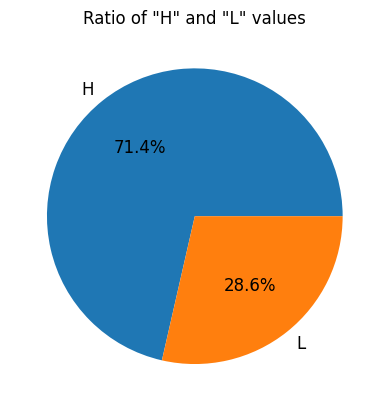

In [146]:
hl_str = ['H' if h >= l else 'L' for h, l in zip(hares, lynxes)]
print(hl_str)

count_H = hl_str.count('H')
count_L = hl_str.count('L')

pie_data = [count_H, count_L]
plt.pie(pie_data, labels = ["H", "L"], autopct='%1.1f%%', textprops={'fontsize': 12})
plt.title('Ratio of "H" and "L" values')
plt.show()


- Plot the change in the hare population and in the lynx population for each year. Find the correlation coefficient between the both time series.

Correlation coefficient: -0.1780


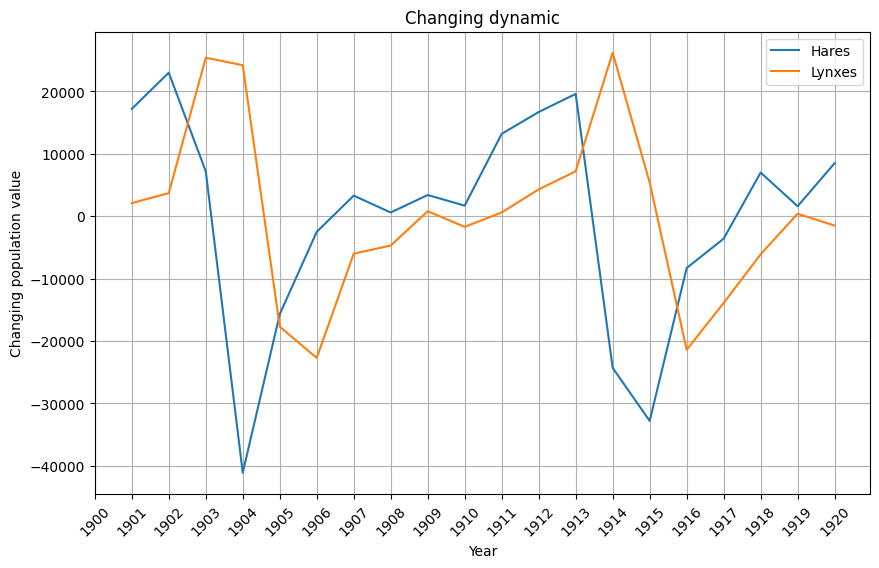

In [171]:
change_hares = [hares[i] - hares[i-1] for i in range(1, len(hares))]
change_lynxes = [lynxes[i] - lynxes[i-1] for i in range(1, len(lynxes))]

plt.figure(figsize=(10, 6))

plt.plot(years[1:], change_hares, label='Hares')
plt.plot(years[1:], change_lynxes, label='Lynxes')

plt.xticks(range(min(years), max(years)+1, 1), rotation = 45)  # Метки через каждый 1 год

plt.xlabel('Year')
plt.ylabel('Changing population value')
plt.title('Changing dynamic')
plt.legend()
plt.grid(True)

correlation_matrix = np.corrcoef(change_hares, change_lynxes)
correlation = correlation_matrix[0, 1]
print(f'Correlation coefficient: {correlation:.4f}')

plt.show()

- Using a scatter plot, show the population of hares vs lynxes by year (each point corresponds to a particular year, and the point coordinates correspond to the population of the two species in that year).

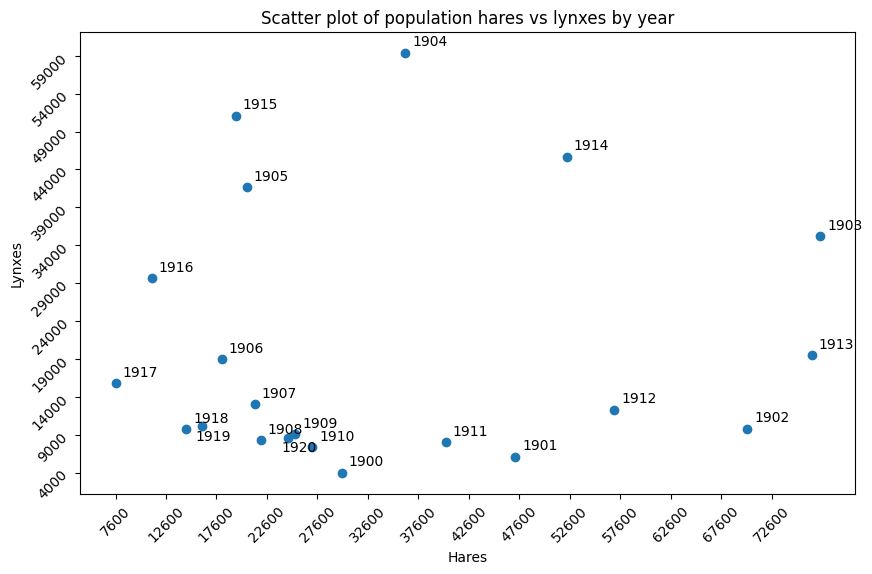

In [259]:
plt.figure(figsize = (10, 6))
plt.scatter(hares, lynxes)

for i, year in enumerate(years[:19]):
    plt.annotate(year, (hares[i], lynxes[i]), xytext=(5, 5), textcoords='offset points')

for i, year in enumerate(years[19:]):
    plt.annotate(year, (hares[i+19], lynxes[i+19]), xytext=(-5, -10), textcoords='offset points')


plt.xticks(range(int(min(hares)), int(max(hares)), 5000), rotation = 45) 
plt.yticks(range(int(min(lynxes)), int(max(lynxes)), 5000), rotation = 45)

plt.xlabel('Hares')
plt.ylabel('Lynxes')
plt.title('Scatter plot of population hares vs lynxes by year')

plt.show()

- Assume the population of hares in 1920 is unknown. Suggest a way to estimate this value. Compare an estimated value
with the true value and print a ratio of the error to the true value.

In [7]:
true_population_1920 = hares[20]

# метод линейной регрессию вручную
# коэфф линии: y = mx + b
m = ((np.mean(years * hares) - np.mean(years) * np.mean(hares)) /
     (np.mean(years ** 2) - np.mean(years) ** 2))
b = np.mean(hares) - m * np.mean(years)

predicted_population_1920 = m * 1920 + b

absolute_error = abs(predicted_population_1920 - true_population_1920)
ratio = absolute_error / true_population_1920 

# Вывод результатов
print("Predicted:", f'{predicted_population_1920:.2f}')
print("True:", f'{true_population_1920:.2f}')
print("absolute error:", f'{absolute_error:.2f}')
print("ratio error:", f'{ratio:.2f}')

Predicted: 20649.78
True: 24700.00
absolute error: 4050.22
ratio error: 0.16
